In [1]:
import numpy as np
import math
import random as random
import matplotlib.pyplot as plt

In [2]:
from abc import abstractstaticmethod

def encontrar_punto_de_distancia(a, b, d):
    # Paso 1: Calcular el vector entre a y b
    ab_vector = np.array(b) - np.array(a)

    # Paso 2: Normalizar el vector ab
    ab_norm = ab_vector / np.linalg.norm(ab_vector)

    # Paso 3: Multiplicar el vector normalizado por la distancia d
    distancia_vector = ab_norm * d

    # Paso 4: Sumar este vector al punto de inicio a
    punto_destino = np.array(a) + distancia_vector

    return punto_destino
state = {
    0 : 'idle',
    1 : 'run',
    2 : 'on the way',
    3 : 'queue',
    4 : 'charging'
}
id_id = {1:0.97, 2:0.97, 3:0.98,4:0.98, 5:0.99, 6:0.99,  7:0.98, 8:0.98,  9:0.97, 10:0.97, 11:0.9, 12:0.9, 13:0.82, 14:0.82, 15:0.41, 16:0.41, 17:0.2, 18:0.2, 19:0.42, 20:0.42, 21:0.49, 22:0.49, 23:0.42, 24:0.42, 25:0.32, 26:0.32, 27:0.42, 28:0.42, 29:0.46, 30:0.46, 31:0.32, 32:0.32, 33:0.18, 34:0.18, 35:0.05, 36:0.05, 37:0.26, 38:0.26, 39:0.58, 40:0.58, 41:0.73, 42:0.73, 43:0.81, 44:0.81, 45:0.87, 46:0.87, 47:0.92, 48:0.92}

avg_speed = {
    1: 38, 2: 38, 3: 37, 4: 37, 5: 37, 6: 36, 7: 36, 8: 32, 9: 32,
    10: 30, 11: 30, 12: 33, 13: 33, 14: 34, 15: 34, 16: 34, 17: 34,
    18: 35, 19: 35, 20: 35, 21: 35, 22: 37, 23: 37, 24: 38, 25: 38,
    26: 37, 27: 37, 28: 37, 29: 36, 30: 36, 31: 32, 32: 32, 33: 30,
    34: 30, 35: 33, 36: 33, 37: 34, 38: 34, 39: 34, 40: 34, 41: 35,
    42: 35, 43: 35, 44: 35, 45: 37, 46: 37, 47: 38, 48: 38
}

class estacion():
  def __init__(self,pos,espacios):
    self.posi=pos
    self.cola=[]
    self.cargando=[]
    self.espacio=espacios
  def addcola(self,carro):
    self.cola.append(carro)
  def addcargando(self,carro):
    if carro in self.cola:
      self.cola.remove(carro)
    self.cargando.append(carro)
  def rem_carr(self,carro):
    self.cargando.remove(carro)
  def get_pos(self):
    return[self.posi[0],self.posi[1]]
class carro():
  def __init__(self,id,pos,SoC,ANX,estacion,ls_estaciones):
    self.id=id
    self.pos=list(pos)
    self.state=0
    self.prev_state=self.state
    self.distance=random.randint(0,33)
    self.soc=SoC
    self.ANX=ANX
    self.id_ch = -self.soc*self.ANX + 1
    self.run_se = self.id_ch
    self.otw=True
    self.ls_stations=ls_estaciones
    self.st=estacion
    if (self.id_ch > 1 - id_id[1]):
      self.id_ch = 1 - id_id[1]
    self.estacion=estacion
    self.MP=np.array([[id_id[1], 1-(id_id[1]+self.id_ch), self.id_ch, 0, 0],
                      [1-(1-id_id[1])-self.run_se, 1-id_id[1], self.run_se, 0, 0],
                      [0, 0, int(self.otw), int(not self.otw),0],
                      [0, 0, 0, int(len(self.estacion.cola) != 0), int(len(self.estacion.cola) == 0)],
                      [0, int(self.soc > 0.25), 0, 0, int(self.soc<=0.25)]])

  def step(self,n):
    self.id_ch = -self.soc*self.ANX + 1
    if (self.id_ch > 1 - id_id[n]):
      self.id_ch = 1 - id_id[n]
    if (self.run_se > 1- (1-id_id[n])):
      self.run_se = 1- (1-id_id[n])
    self.MP=np.array([[id_id[n], 1-(id_id[n]+self.id_ch), self.id_ch, 0, 0],
                      [1-(1-id_id[n])-self.run_se, 1-id_id[n], self.run_se, 0, 0],
                      [0, 0, int(self.otw), int(not self.otw),0],
                      [0, 0, 0, int(len(self.estacion.cola) != 0), int(len(self.estacion.cola) == 0)],
                      [0, int(self.soc > 0.25), 0, 0, int(self.soc<=0.25)]])
    #print('p_state='+str(self.prev_state))
    #print('prob='+str(self.MP[self.prev_state]))
    self.state = np.random.choice([0,1,2,3,4], p=self.MP[self.prev_state])
    if(state[self.state] == 'on the way'):
      self.distance=math.dist(self.pos, self.estacion.posi)
      if(self.distance - avg_speed[n]/2 <= 0):
        self.otw=False
        self.distance = 0
        epos=self.estacion.get_pos()
        self.pos=epos
        self.estacion.addcola(self.id)
      else:
        self.otw=True
        self.distance = self.distance-avg_speed[n]/2
        self.pos=encontrar_punto_de_distancia(self.pos,self.estacion.posi,self.distance)
    if(state[self.state] == 'charging'):
      self.soc += 0.25 #If a car is being charged then the soc will increase 75% because of our assumptions
      if (self.soc >1):
        self.soc = 1
        self.estacion.rem_carr(self.id)
    if(state[self.state] == 'queue'):
      if len(self.estacion.cargando) < self.estacion.espacio:
        self.estacion.addcargando(self.id)
    if(state[self.state] == 'run'):
      if self.id in self.estacion.cargando:
        self.estacion.rem_carr(self.id)
      self.distance=random.uniform(0,avg_speed[n]/2)
      angle = random.uniform(0, 2 * math.pi)
      self.pos[0]=self.pos[0] + self.distance * math.cos(angle)
      self.pos[1]=self.pos[1] + self.distance * math.sin(angle)
      self.soc -= 0.05
    self.prev_state = self.state
  def rnd_walk(self, n, graf):
    ls = []
    for x in range(n):
        self.step((x % 48) + 1)
        ls.append(self.state)
    if graf:
        color = np.random.rand(3,)
        plt.scatter(range(n), ls, color=color)
        plt.title("Random Walk")
        plt.xlabel("Time (t)")
        plt.ylabel("State")

    return ls

  def __str__(self):
    return "pos= "+str(self.pos)+"\n estado: "+str(state[self.state])+"\n soc: "+str(self.soc)+"\n matriz:\n "+str(self.MP)
  def return_estado(self):
    return str(state[self.state])
  def search_station(self):
    act_st=self.st
    for i in self.ls_stations:
        d1=math.dist(act_st.posi,self.pos)
        d2=math.dist(i.posi,self.pos)
        if d2<d1:
          act_st=i
    self.st=act_st
class test():
  def __init__(self,est,n_car):
    self.est=est
    self.carro=[]
    id=0
    for e in est:
      for n in range(n_car):
        crr=carro(id,e.posi,random.random(),random.random(),e,est)
        self.carro.append(crr)
        id+=1
  def crr(self):
    print(self.carro)
  def graph(self):
    for e in self.est:
      plt.scatter(e.posi[0],e.posi[1],marker='s',color=(0, 0, 0))
    for c in self.carro:
      plt.scatter(c.pos[0],c.pos[1],marker='o')

  def rw(self,n,graf):
    for i in range(n):
      for c in self.carro:
        c.rnd_walk(n,graf)
        c.search_station()
      plt.show()
      self.graph()
      plt.show()



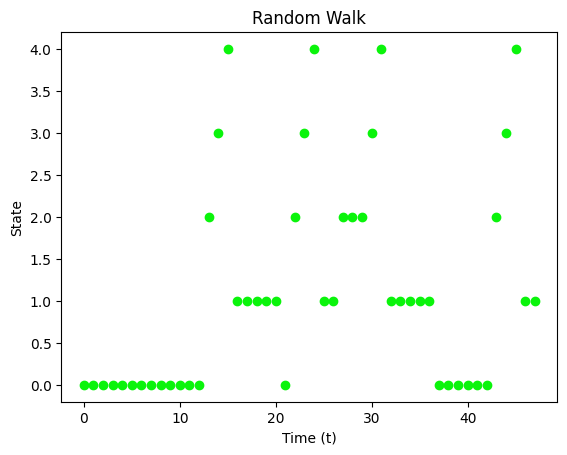

In [3]:
n=48
e1=estacion((0,0),1)
carr1=carro(1,[2,1],0.26,0.9,e1,[e1])
w=carr1.rnd_walk(n,True)

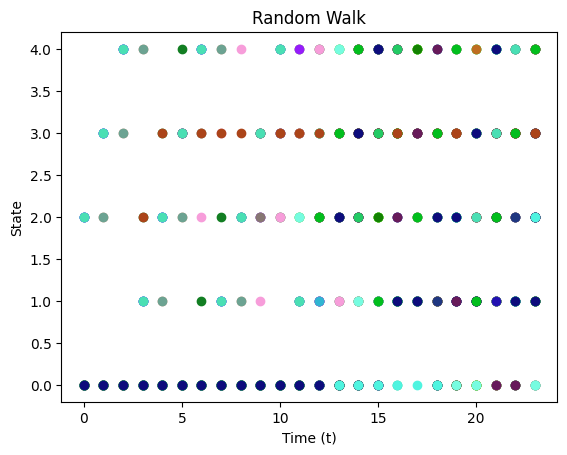

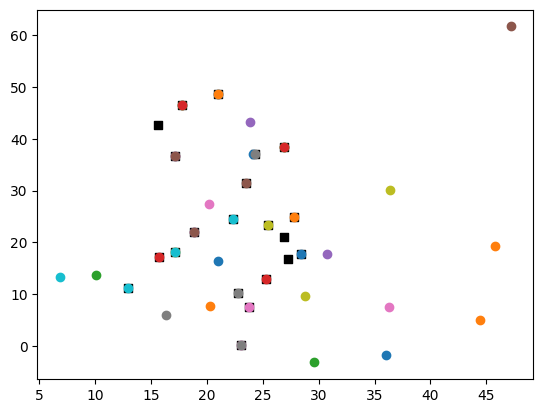

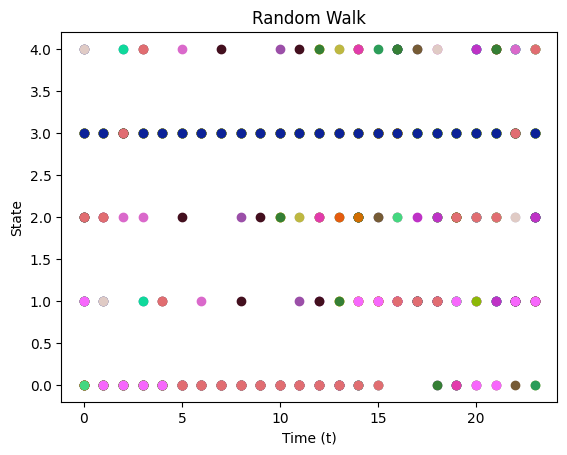

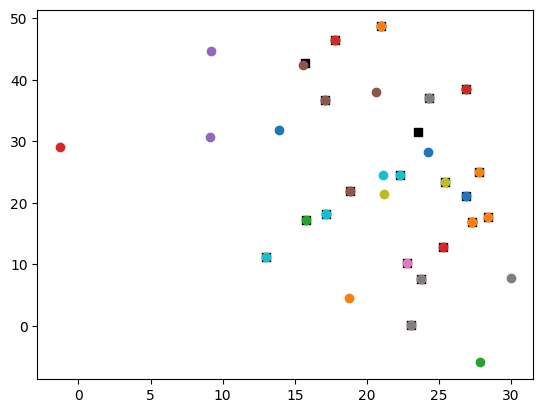

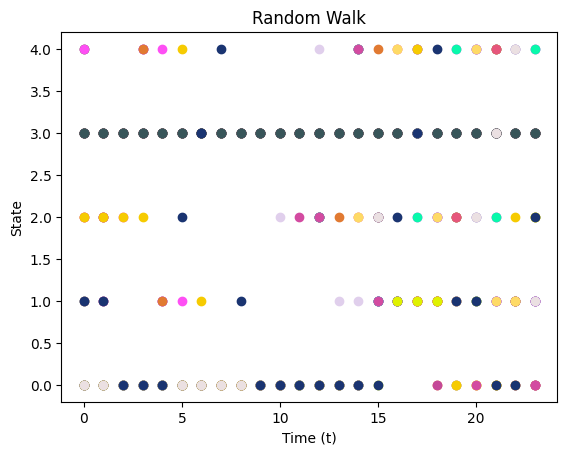

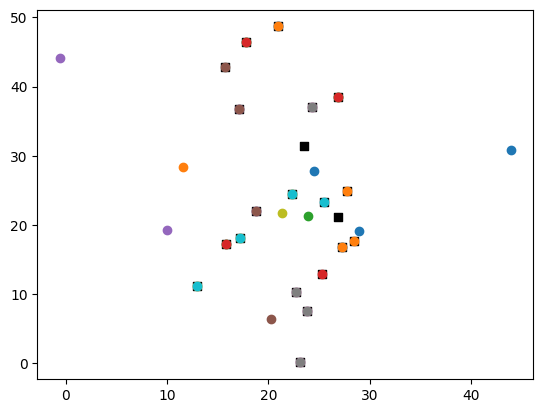

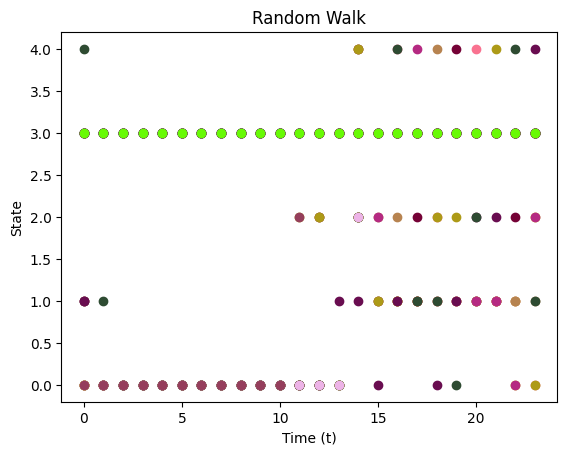

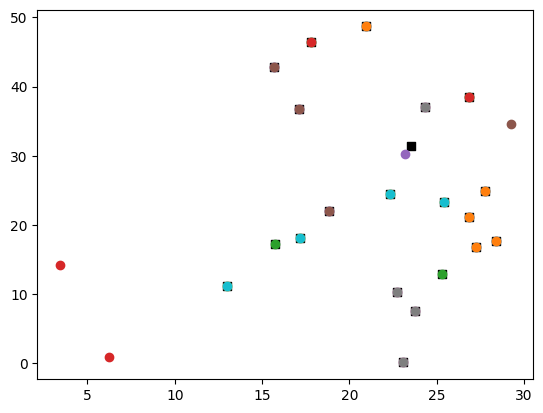

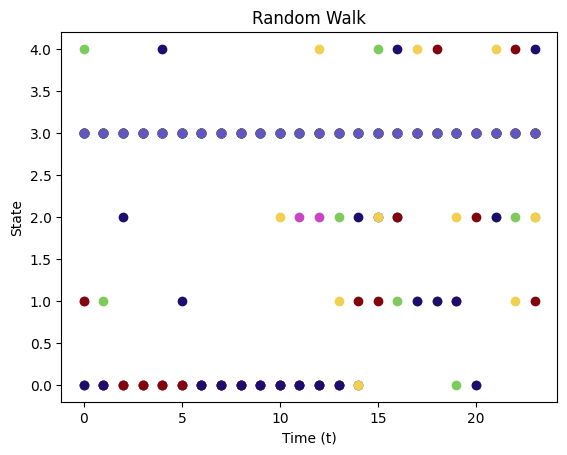

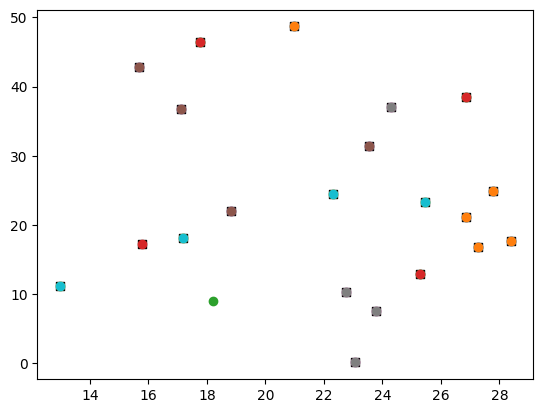

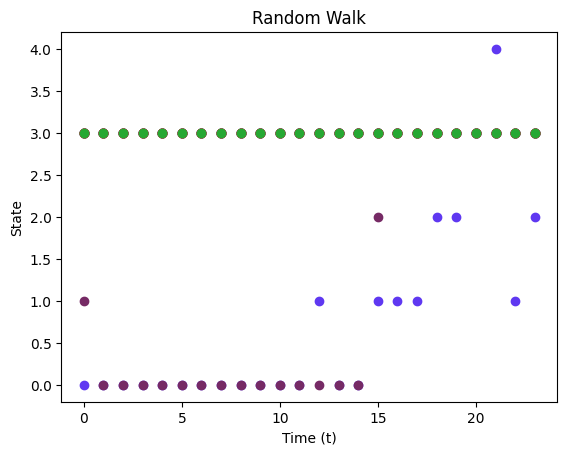

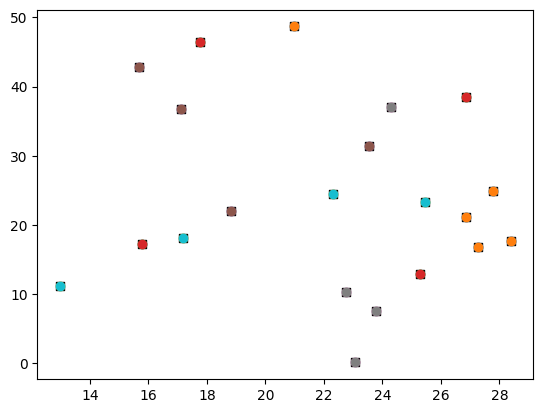

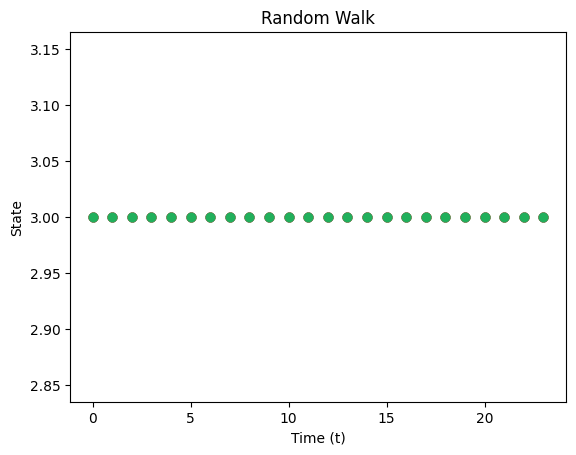

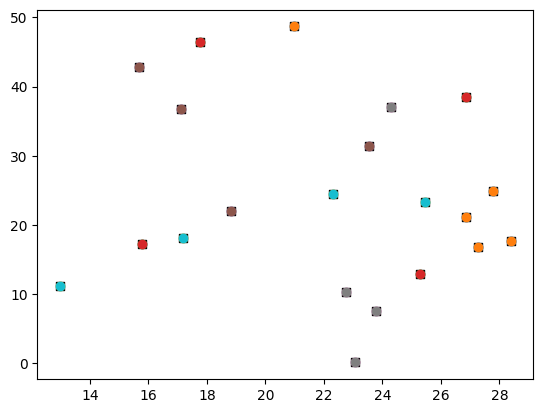

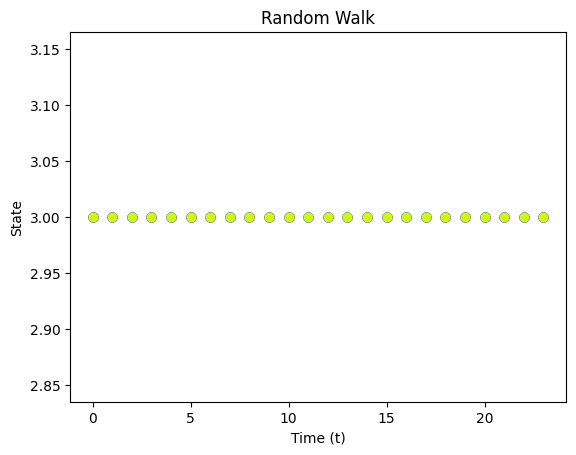

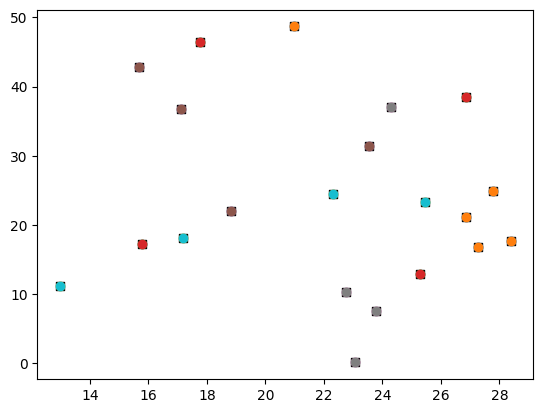

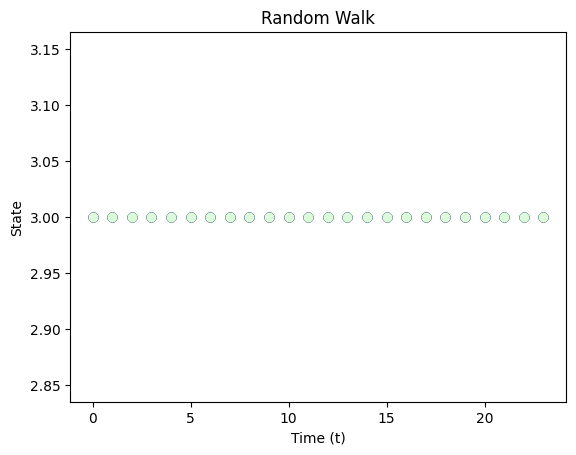

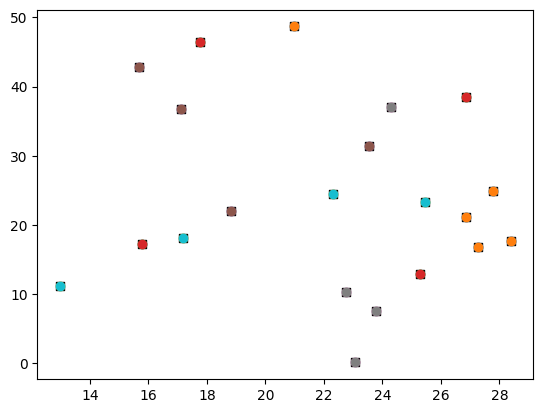

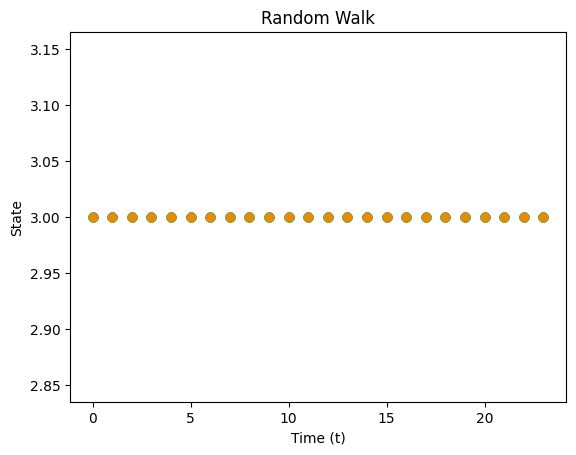

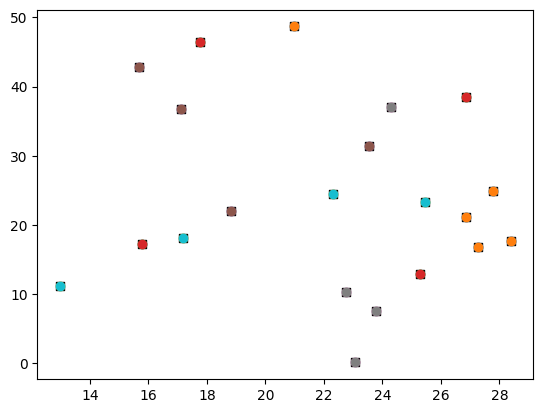

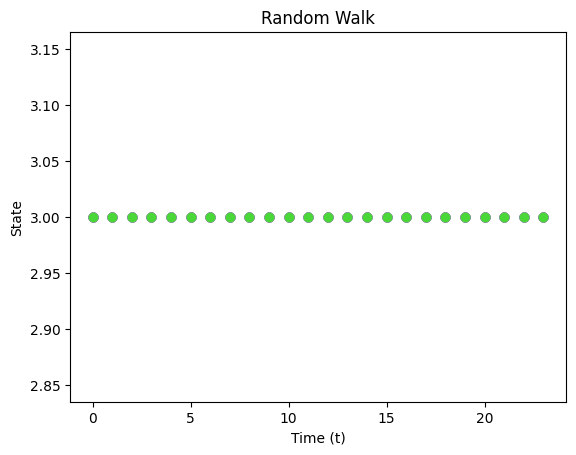

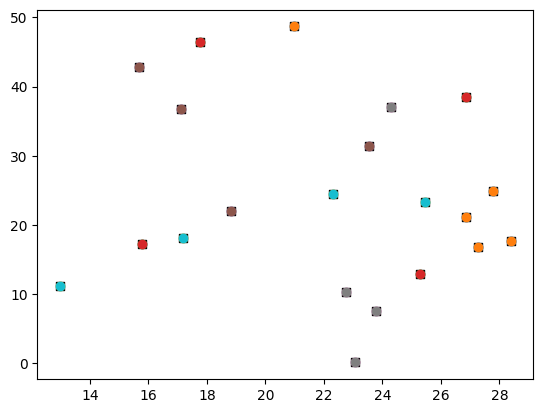

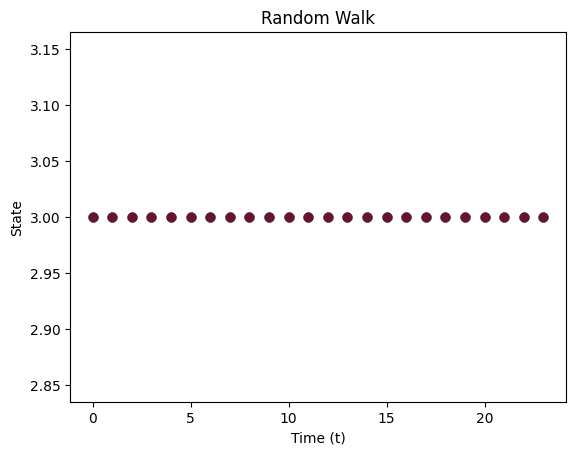

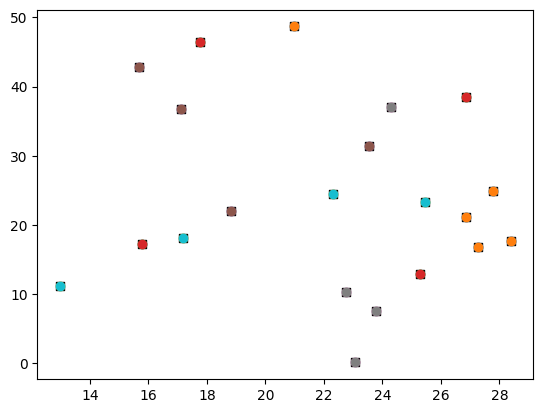

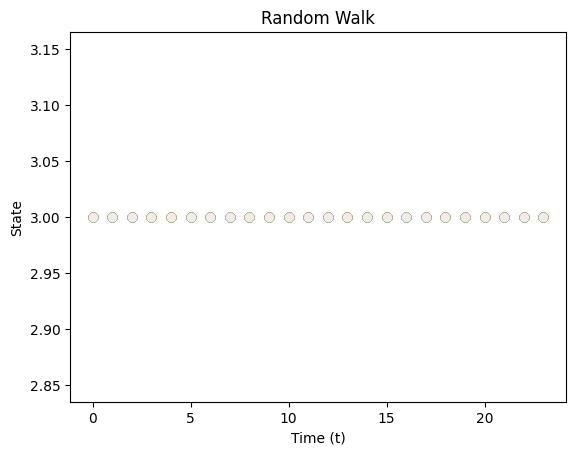

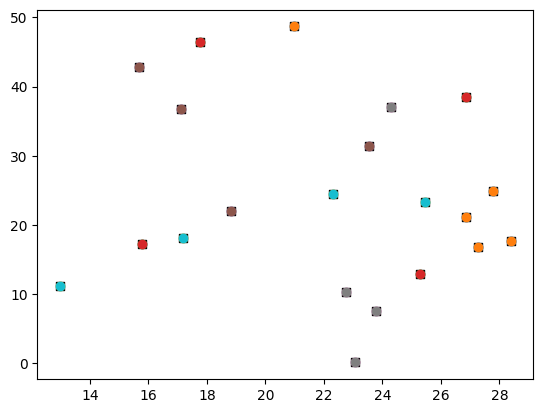

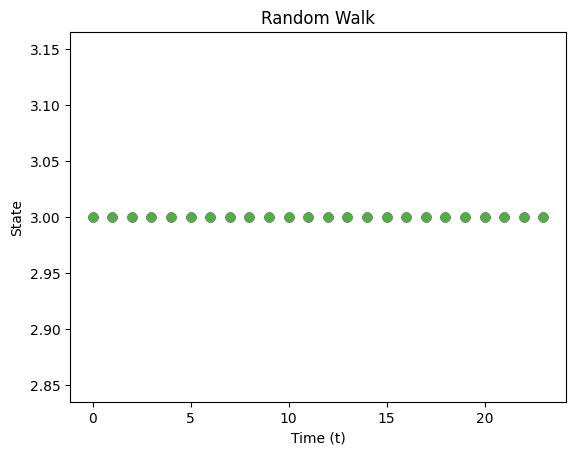

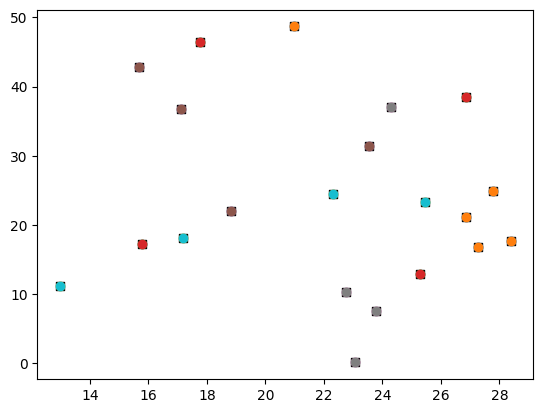

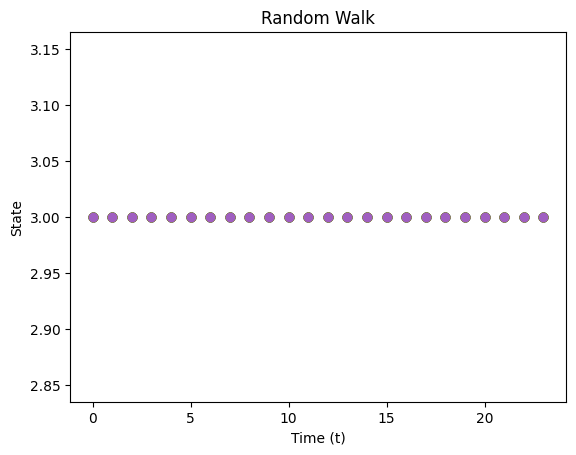

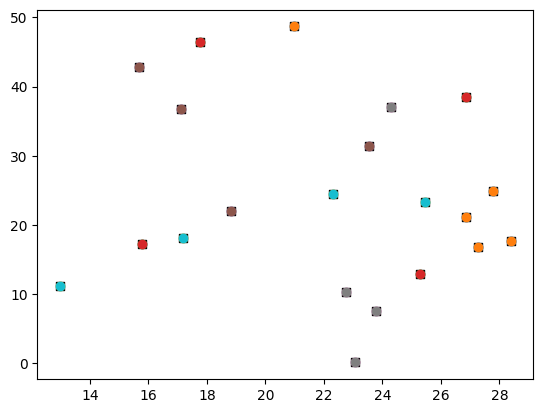

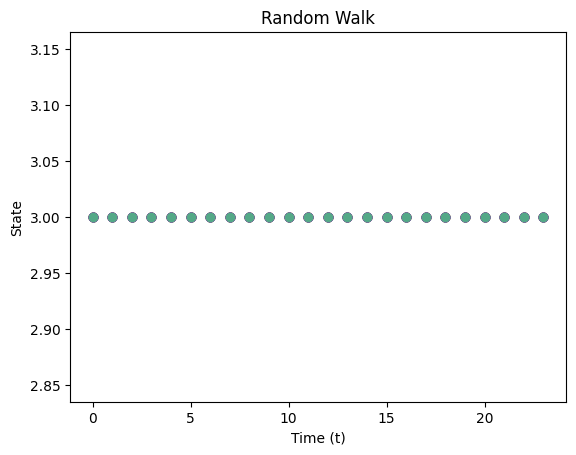

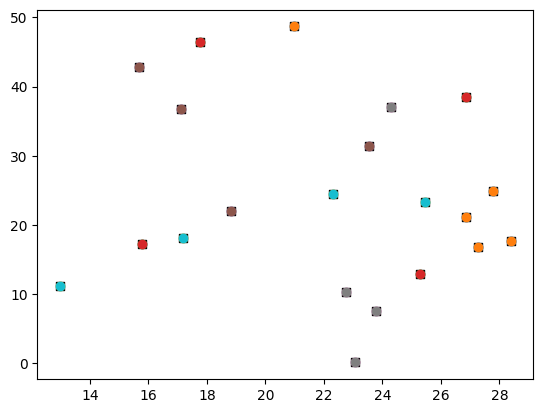

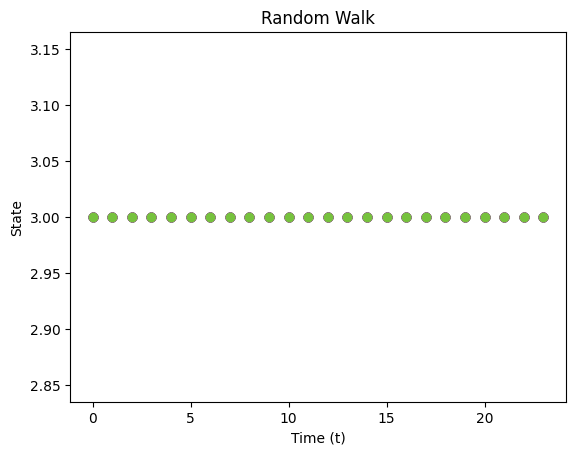

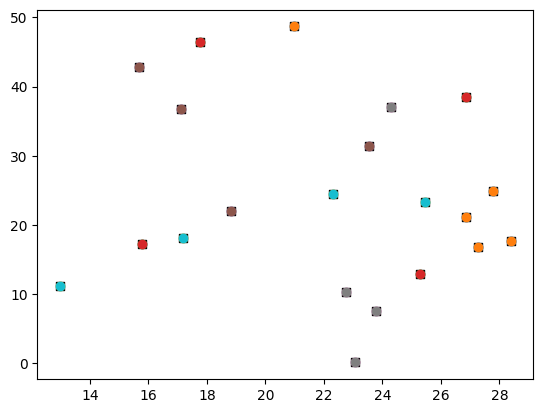

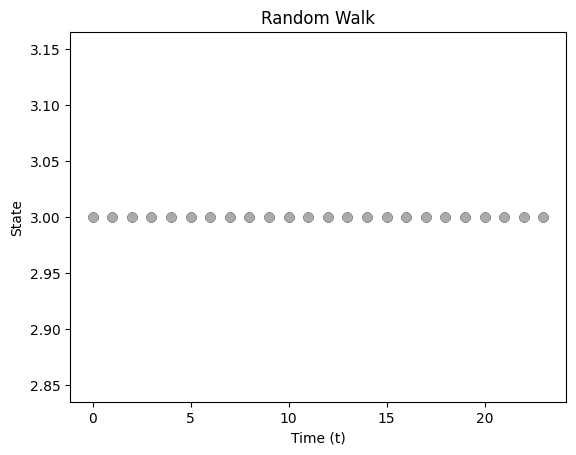

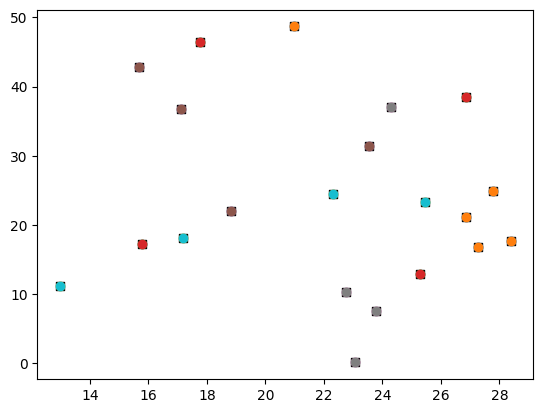

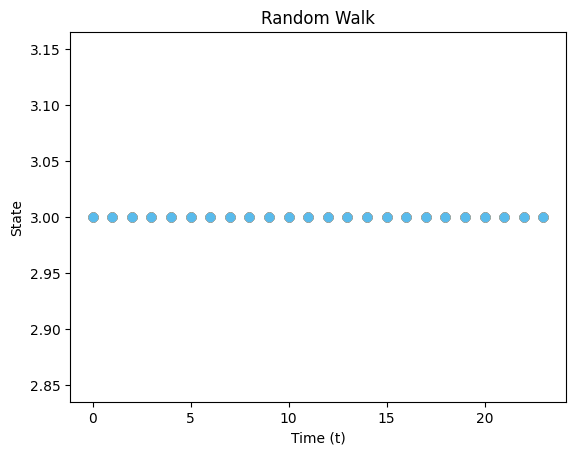

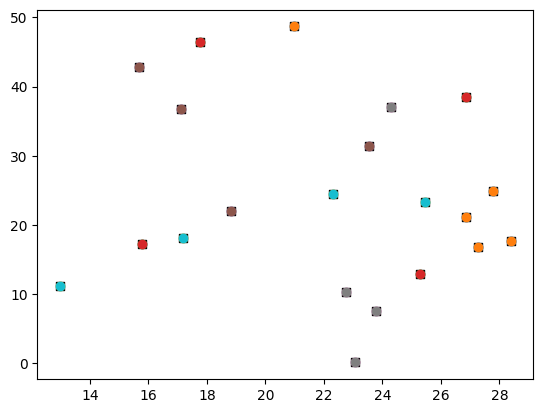

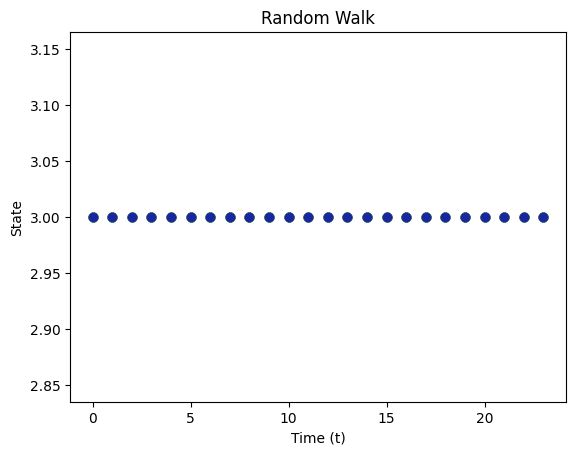

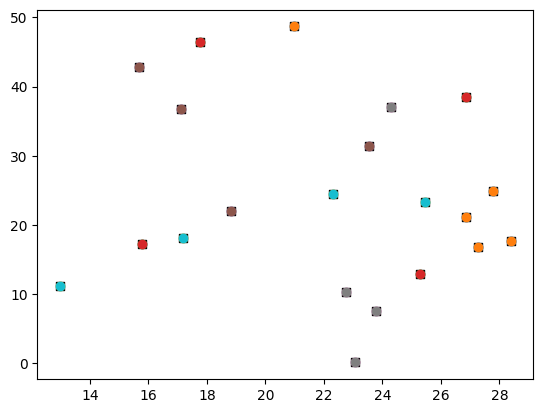

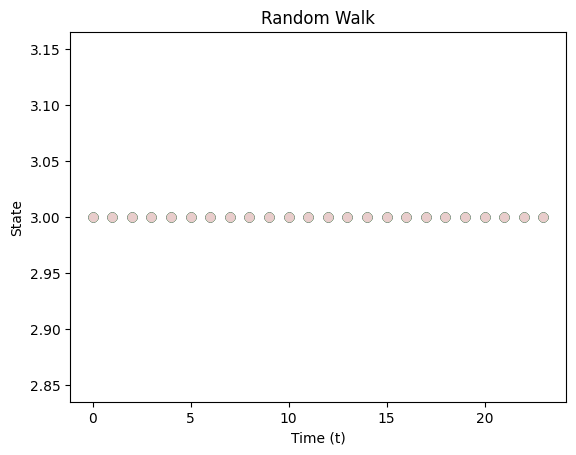

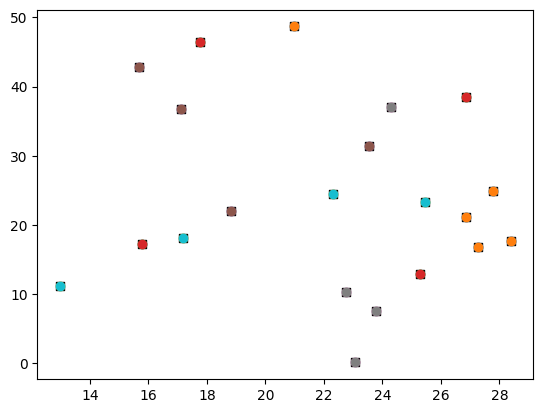

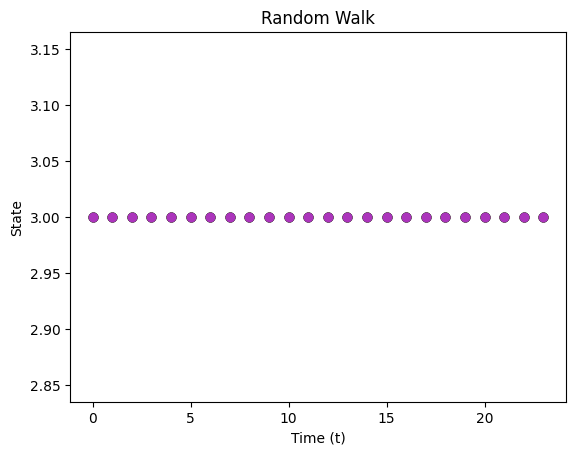

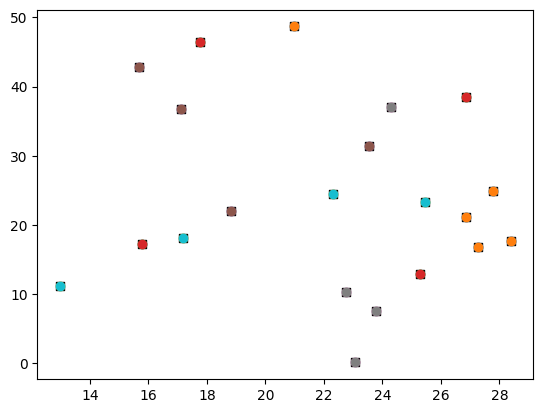

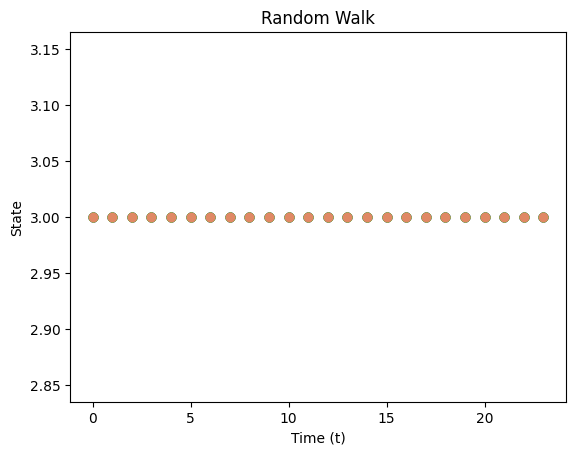

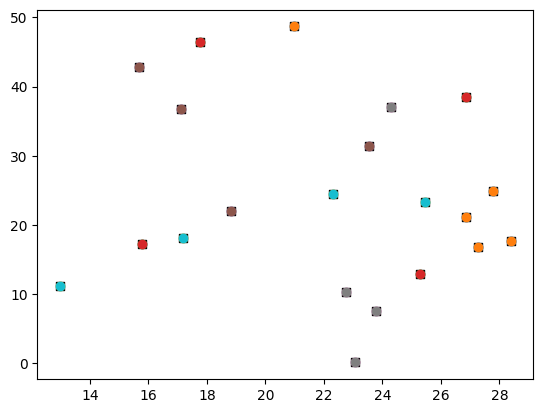

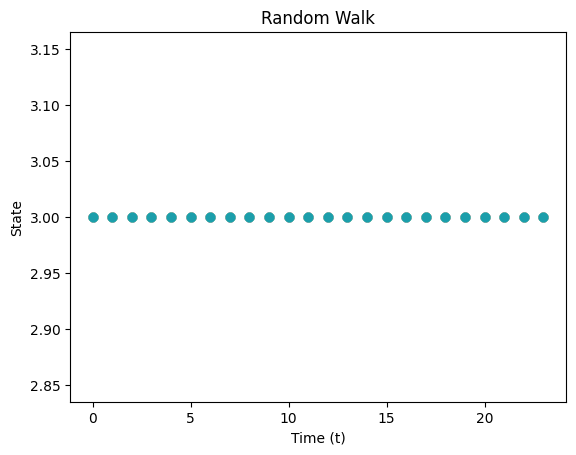

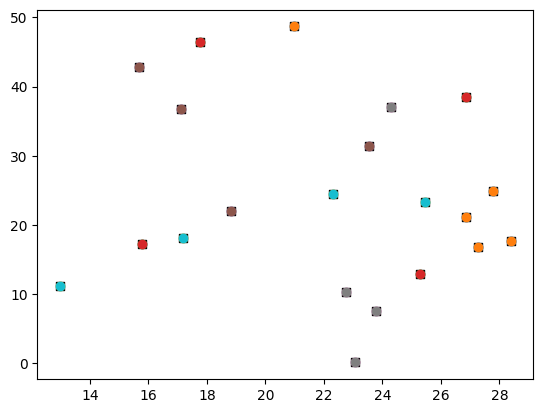

In [5]:
e=[(26865.84942489909, 2109.830784505233), (25298.024425385054, 1284.6916482448578), (23539.59022672521, 3144.5750941596925), (23066.487860274967, 11.721919359639287), (22324.753645021003, 2453.035769270733), (27782.833653348498, 2494.8248561080545), (26870.9737321157, 3846.8265327960253), (15677.412497409154, 4277.28237744607), (23764.82558222348, 754.8836335018277), (17176.14592531277, 1816.9697390999645), (20976.037688129116, 4869.168780548498), (15767.633990231436, 1722.9902343265712), (18811.56056105951, 2196.740975294262), (22752.36128413258, 1024.2816129792482), (25444.233691329136, 2338.0229985304177), (27251.170140984003, 1686.6828390955925), (17782.396590193734, 4650.148113042116), (17118.37137043802, 3670.5361185893416), (24309.4778401996, 3702.5641554612666), (12978.089233598672, 1114.319756431505), (28387.03613943141, 1769.5681714117527)]
k=[]
for n in e:
  k.append(estacion((n[0]/1000,n[1]/100),4))
t=test(k,2)
t.rw(24,True)